In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler



In [5]:
df=pd.read_csv("Mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#chnage colums names
df.columns=['CustomerID','Gender','Age','Annual Income ','Spending Score ']

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.drop(["CustomerID","Gender"],axis=1,inplace=True)

In [9]:
df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


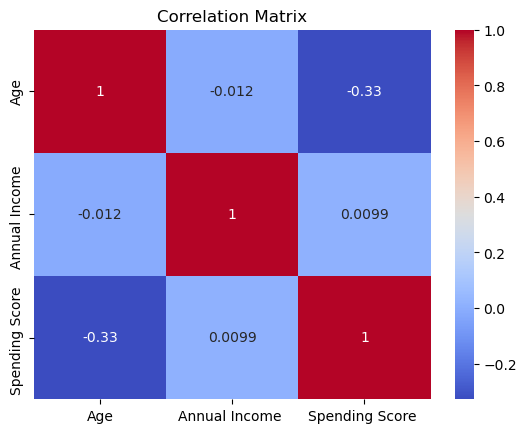

In [10]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


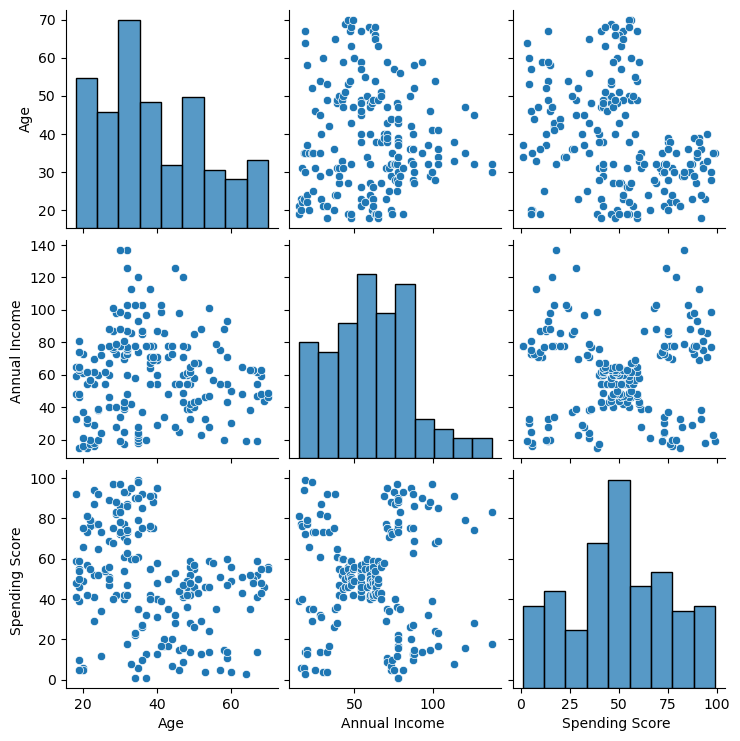

In [11]:
sns.pairplot(data=df)
plt.show()

In [12]:
scalar=StandardScaler()
scaled_data=scalar.fit_transform(df)
data=pd.DataFrame(scaled_data,columns=df.columns)
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [13]:
data

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


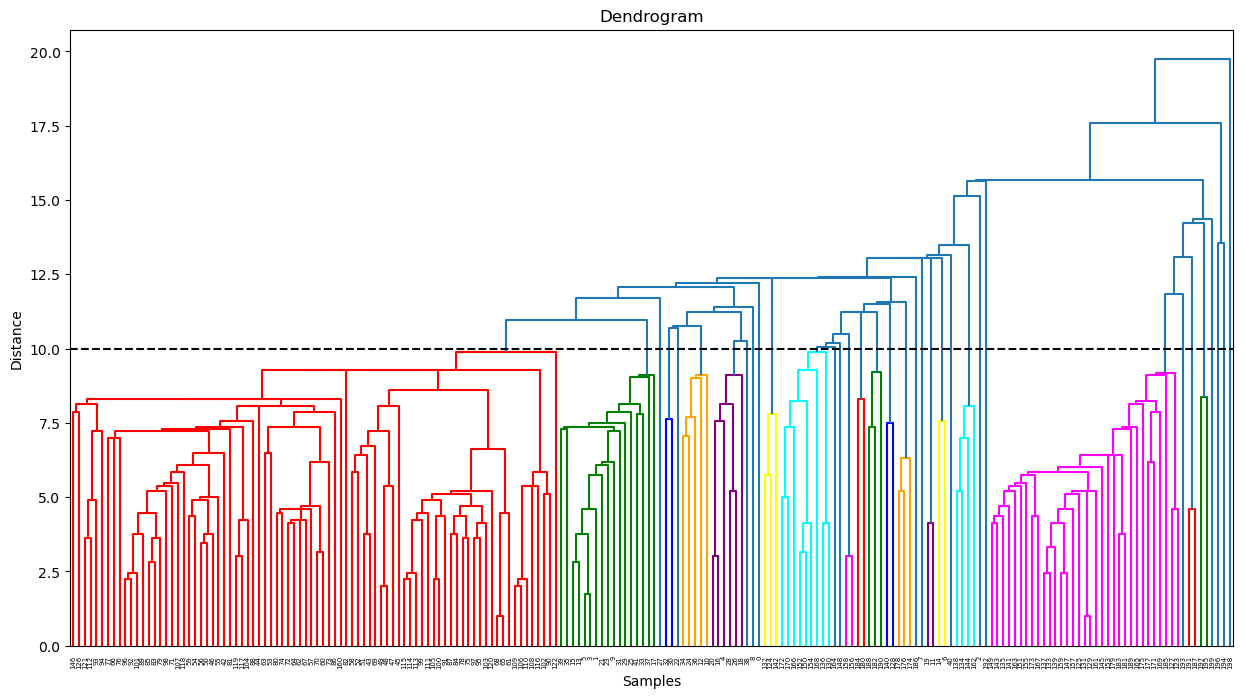

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import set_link_color_palette

set_link_color_palette(['red', 'green', 'blue', 'orange', 'purple','yellow','cyan','magenta'])

linked=linkage(df,method="single")
plt.figure(figsize=(15,8))
dendrogram(linked,orientation="top",distance_sort="descending",show_leaf_counts=True,color_threshold=10)
plt.axhline(y=10, c='black', linestyle='--')

plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [15]:
#train model
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5)
model.fit(data)
data['labels']=model.labels_


In [16]:
data.head()

,Age,Annual Income,Spending Score,labels
0,-1.424569,-1.738999,-0.434801,4
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,4


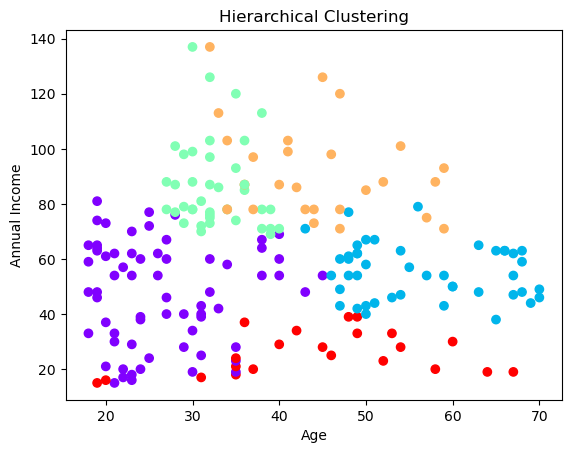

In [17]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=data['labels'], cmap='rainbow')
plt.title("Hierarchical Clustering")
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()



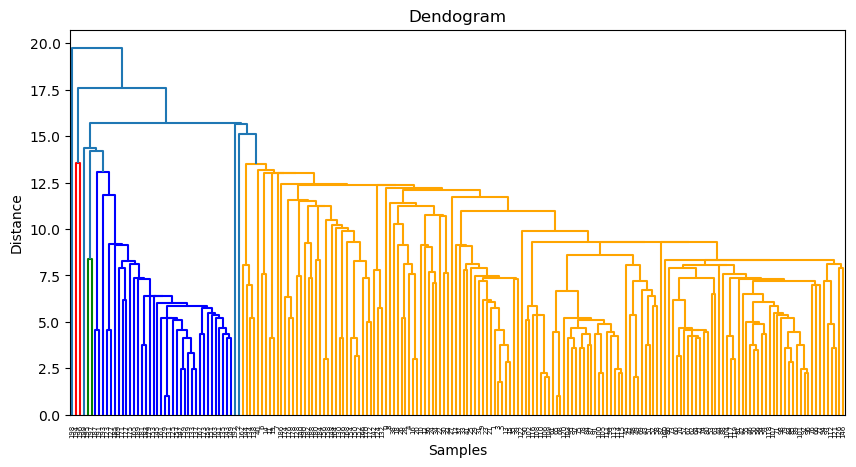

In [18]:
plt.figure(figsize=(10,5))
dendrogram(linked)
plt.axhline(y=150,color='r',linestyle='--')
plt.title("Dendogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [19]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(linked, t=150, criterion='distance')

n_clusters = len(set(clusters))
print("Number of clusters:", n_clusters)


Number of clusters: 1


In [20]:
#save the model
data.to_csv("Mall_hierarchi_clustered.csv",index=False)

In [21]:
X=data.drop(columns=["labels"],axis=1)
y=data["labels"]

In [22]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Predicted Clusters:",y_pred)
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))


Predicted Clusters: [0 0 4 3 3 0 0 3 3 0 1 3 2 0 3 2 1 3 1 0 0 4 3 0 0 1 0 1 2 0 0 4 1 0 3 1 2
 2 3 1]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.75      1.00      0.86         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         3

    accuracy                           0.95        40
   macro avg       0.95      0.97      0.96        40
weighted avg       0.96      0.95      0.95        40

Confusion Matrix:
 [[14  2  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0  3]]
Accuracy Score: 0.95


In [23]:
import joblib
joblib.dump(model,"hierarchiral.pkl")

['hierarchiral.pkl']